<h2>Style detection </h2>
1. In this part, we focus on detecting different bracelet style. Those styles can be seen from cartier website (http://www.cartier.com/en-us/collections/jewelry/categories/bracelets.html). 
2. The images are obtained from the google image search with the corresponding keywords.
3. Instead of using image classification, google image search classifies their images using image descriptions. However, some of those descriptions are not correct. 
4. Why style detection is important?  A particular style is usually difficult to describe with words but can be determined easily from visualization.


In [63]:
import os
import shutil
path = "/data/notebooks/visualrecommender/Dan_Li/Study_group/data/google_image_4"

#there are 4 different styles for cartier bracelets
for index,ff in enumerate(os.listdir(path)):
    if index >=0: 
        print(index,ff)
fold_name_list = ['AGRAFE BRACELETS','AMULETTE DE CARTIER BRACELETS','C DE CARTIER BRACELETS','CACTUS DE CARTIER BRACELETS']

0 AMULETTE DE CARTIER BRACELETS
1 C DE CARTIER BRACELETS
2 AGRAFE BRACELETS
3 CACTUS DE CARTIER BRACELETS
4 __MACOSX


## 1. Loading images from 4 different styles
1. AGRAFE BRACELETS : a device as a hook
2. AMULETTE DE CARTIER BRACELETS: object intended to bring protection to its owner 
3. C DE CARTIER BRACELETS
4. CACTUS DE CARTIER BRACELETS

Cartier bracelet style: AGRAFE BRACELETS


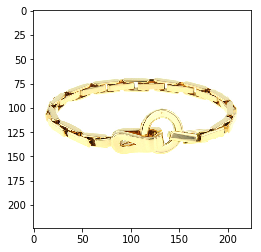

Cartier bracelet style: AMULETTE DE CARTIER BRACELETS


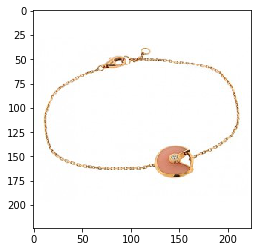

Cartier bracelet style: C DE CARTIER BRACELETS


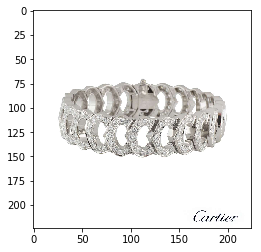

Cartier bracelet style: CACTUS DE CARTIER BRACELETS


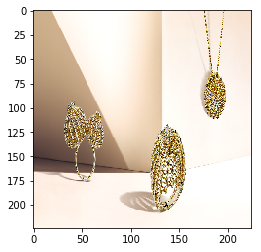

In [64]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
 
directory1 = "/data/notebooks/visualrecommender/Dan_Li/Study_group/data/google_image_4/"
directory3 = '.jpg'

key_list = fold_name_list[:4]
for key in key_list:
    directory2 = key+str('/')
    index = 2
    img_path = directory1+directory2+str(index)+directory3

    original = load_img(img_path, target_size=(224, 224))
    print('Cartier bracelet style: %s'%key)
    plt.imshow(original)
    plt.show()


## 2. Get features from the first fully connected layer 
In this case, we pre-compute those features and save them in a CSV file.

In [65]:
data_all = pd.read_csv("classes_21_data.csv")
label_df = pd.read_csv("classes_21_label.csv")
image_id_df = pd.read_csv("classes_21_image_id.csv")

data_all = data_all.drop(['Unnamed: 0'],axis=1)
label_df = label_df.drop(['Unnamed: 0'],axis=1)
image_id_df = image_id_df.drop(['Unnamed: 0'],axis=1)

label_all  = label_df.label
image_id_all = image_id_df.image_id

In [66]:
print(data_all.shape)
print(label_df.shape)
print(image_id_df.shape)

(2045, 4096)
(2045, 1)
(2045, 1)


In [67]:
X = data_all
Y = label_df.label
print(X.shape,Y.shape)

(2045, 4096) (2045,)


In [68]:
num_class_list = pd.value_counts(label_df.label, sort=False)
sum(num_class_list[:4])
#1:99, 2:98, 3:99

392

## <font color="red">3. Build the classifier (4 classes) </font>
Our data contains 4 different styles 

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [70]:
num_class = sum(num_class_list[:4])
X12 = X.iloc[:num_class,:]
Y12  = Y[:num_class]

#train and test split: 3/5 as the training set and the rest as the testing set
X_train,X_test,Y_train,Y_test=train_test_split(X12,Y12,test_size=0.2,
                                              random_state=0)
print(X_train.shape,X_test.shape)

logreg = LogisticRegression(multi_class='multinomial',solver='newton-cg')
logreg.fit(X_train,Y_train)

class_predict=logreg.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(Y_test,class_predict))

print(classification_report(Y_test,class_predict))

print("Confusion matrix: \n",confusion_matrix(Y_test, class_predict))
predict_proba = logreg.predict_proba(X_test)

(313, 4096) (79, 4096)
Accuracy:  0.7974683544303798
             precision    recall  f1-score   support

          1       0.81      0.77      0.79        22
          2       0.76      0.76      0.76        21
          3       0.67      0.71      0.69        17
          4       0.95      0.95      0.95        19

avg / total       0.80      0.80      0.80        79

Confusion matrix: 
 [[17  2  3  0]
 [ 2 16  3  0]
 [ 2  2 12  1]
 [ 0  1  0 18]]


In [71]:
folder_1_image_id = []
folder_2_image_id = []
folder_3_image_id = []
folder_4_image_id = []
predict_1 = []
predict_2 = []
predict_3 = []
predict_4 = []
for i,index in enumerate(Y_test.index):
    if index >= sum(num_class_list[:3]):
        folder_4_image_id.append(image_id_all[index])
        predict_4.append(i)
    elif index >= sum(num_class_list[:2]):
        folder_3_image_id.append(image_id_all[index])
        predict_3.append(i)
    elif index >= num_class_list[1]:
        folder_2_image_id.append(image_id_all[index])
        predict_2.append(i)
    else:
        folder_1_image_id.append(image_id_all[index])
        predict_1.append(i)       
print(len(folder_1_image_id))
print(len(folder_2_image_id))
print(len(folder_3_image_id))
print(len(folder_4_image_id))

22
21
17
19


class_predict:  1
[9.99905569e-01 5.30667482e-06 8.84910756e-05 6.33013489e-07]


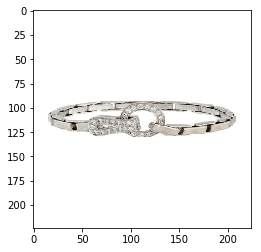

class_predict:  1
[9.99985719e-01 1.00523981e-06 1.32737438e-05 1.84592243e-09]


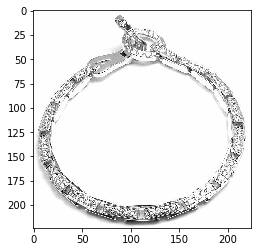

class_predict:  3
[3.65255278e-05 1.12881812e-05 9.99943048e-01 9.13796346e-06]


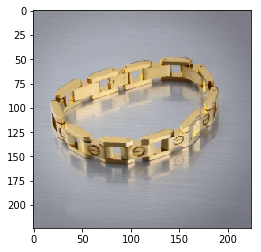

class_predict:  3
[3.62197515e-04 1.46903192e-05 9.99621144e-01 1.96818303e-06]


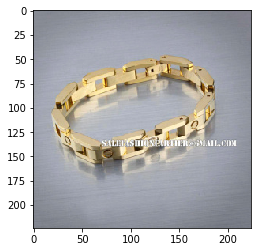

class_predict:  1
[9.99994248e-01 6.55273039e-07 1.42766081e-06 3.66876998e-06]


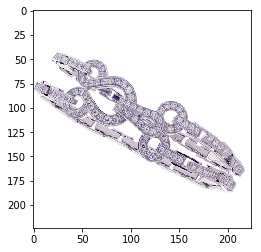

class_predict:  1
[9.99675534e-01 1.06986126e-04 9.39951310e-05 1.23484554e-04]


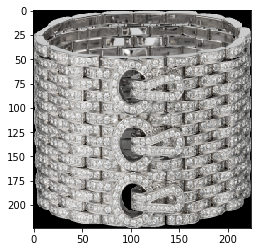

class_predict:  1
[9.99931946e-01 9.56875091e-06 5.56156438e-05 2.86984171e-06]


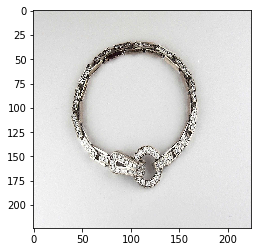

class_predict:  1
[9.99994582e-01 5.37819811e-06 2.53617813e-08 1.45043982e-08]


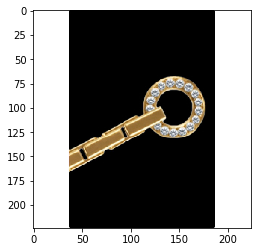

class_predict:  1
[9.98751791e-01 9.40723009e-04 2.94107656e-04 1.33782012e-05]


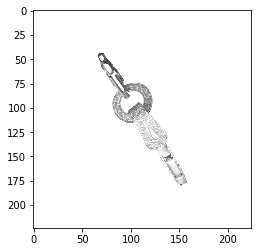

class_predict:  1
[9.99974088e-01 2.39100235e-09 2.59097621e-05 3.05708816e-11]


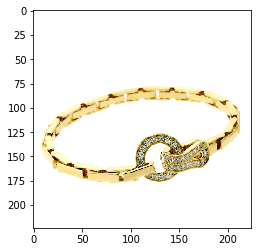

class_predict:  1
[9.99449836e-01 5.33535162e-05 2.04718018e-04 2.92092693e-04]


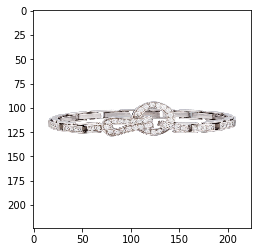

class_predict:  2
[0.26702907 0.70265372 0.01146239 0.01885482]


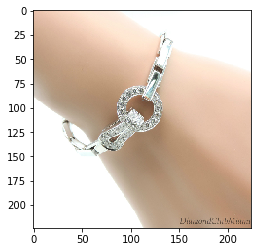

class_predict:  2
[0.2299802  0.57699897 0.00292085 0.19009997]


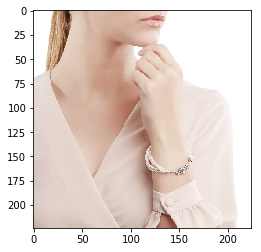

class_predict:  1
[9.99999987e-01 8.90838635e-09 4.33723737e-09 7.51810294e-12]


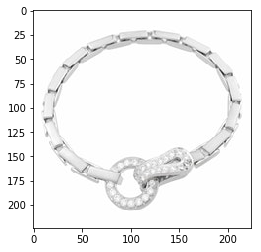

class_predict:  1
[9.99999430e-01 4.31109653e-09 5.65900067e-07 6.57429409e-15]


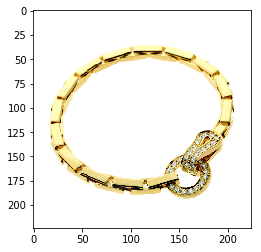

class_predict:  1
[9.99851562e-01 1.75145782e-06 1.46602555e-04 8.39089532e-08]


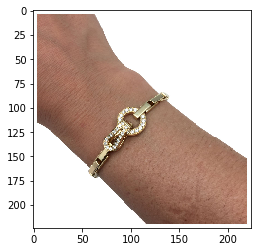

class_predict:  1
[9.99990185e-01 2.31698514e-11 9.81532611e-06 1.78658325e-14]


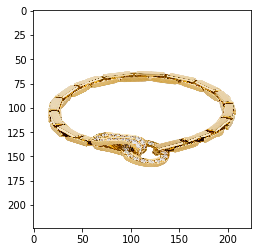

class_predict:  3
[1.87630790e-01 9.18152940e-06 8.12359835e-01 1.92750286e-07]


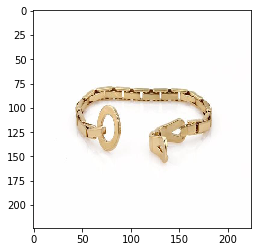

class_predict:  1
[6.70764945e-01 7.86021532e-03 3.21374732e-01 1.06870254e-07]


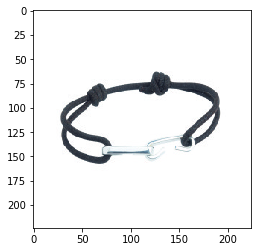

class_predict:  1
[9.94216861e-01 2.74528886e-03 3.02091132e-03 1.69391057e-05]


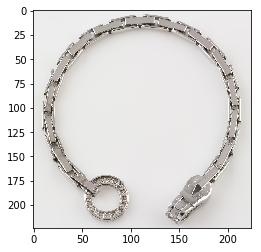

class_predict:  1
[9.99977071e-01 8.11910246e-06 1.32613449e-05 1.54807074e-06]


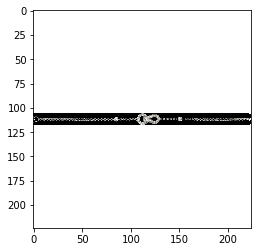

class_predict:  1
[9.99998541e-01 3.03322295e-09 1.45540193e-06 4.57146618e-10]


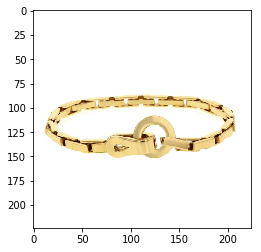

In [72]:
directory_1 = "/data/notebooks/visualrecommender/Dan_Li/Study_group/data/google_image_4/"
directory_2 = str(fold_name_list[0])+"/"
for i,image_id in enumerate(folder_1_image_id):
    print("class_predict: ",class_predict[predict_1[i]])
    print(predict_proba[predict_1[i]])
    img_path = directory_1+directory_2+str(image_id)+".jpg"
    original = load_img(img_path, target_size=(224, 224))
    plt.imshow(original)
    plt.show()

class_predict:  1
[0.91763523 0.05227785 0.00646378 0.02362314]


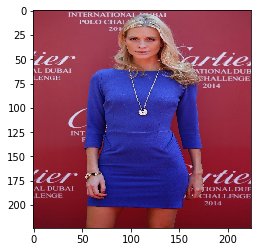

class_predict:  3
[2.54787507e-03 8.08873755e-02 9.16558064e-01 6.68536526e-06]


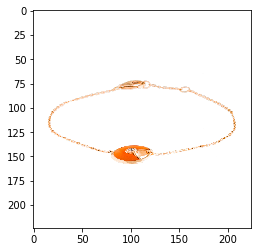

class_predict:  2
[1.80955518e-05 9.83569010e-01 1.64078386e-02 5.05608940e-06]


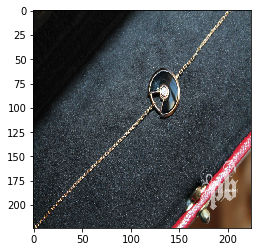

class_predict:  3
[2.03674069e-06 2.04930433e-03 9.96353298e-01 1.59536068e-03]


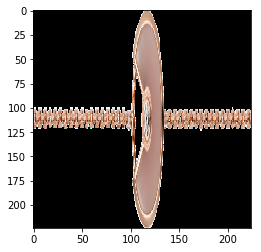

class_predict:  2
[8.86874830e-06 9.99968441e-01 8.63430791e-06 1.40562451e-05]


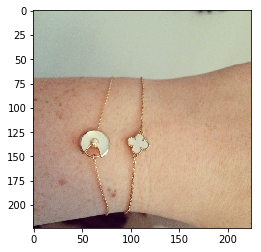

class_predict:  2
[2.02154698e-06 9.99870152e-01 4.58891951e-09 1.27821915e-04]


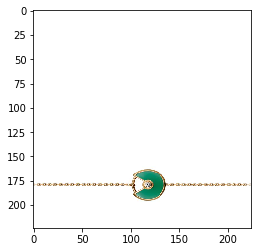

class_predict:  1
[8.61082624e-01 1.38414573e-01 3.34693518e-05 4.69333342e-04]


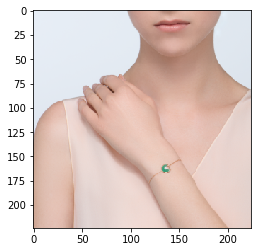

class_predict:  2
[8.72669968e-05 8.92941836e-01 1.06908457e-01 6.24403264e-05]


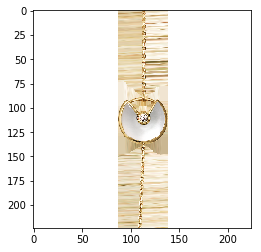

class_predict:  2
[3.47514764e-09 9.99999994e-01 9.33218393e-10 1.86887718e-09]


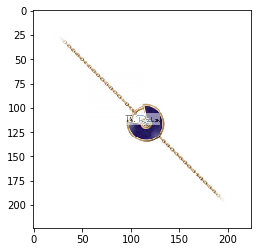

class_predict:  2
[2.62177657e-03 9.65883091e-01 3.07831260e-02 7.12006052e-04]


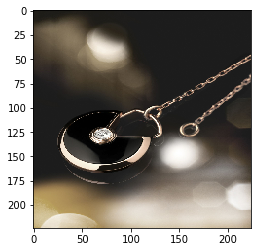

class_predict:  2
[0.00163401 0.97264484 0.0235586  0.00216255]


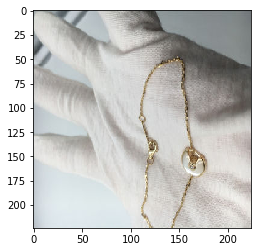

class_predict:  2
[2.58513674e-11 9.99999964e-01 1.62428312e-12 3.63861553e-08]


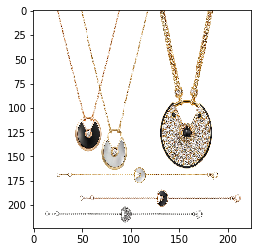

class_predict:  2
[4.50164799e-03 9.95244811e-01 1.37820151e-04 1.15720780e-04]


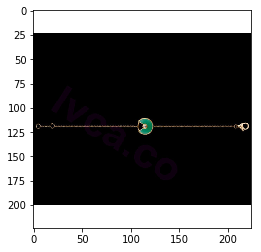

class_predict:  2
[4.10916844e-05 9.99949025e-01 2.02042941e-06 7.86305576e-06]


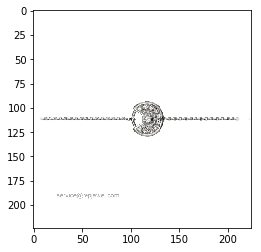

class_predict:  3
[2.21950236e-04 4.67207639e-02 9.53050599e-01 6.68637434e-06]


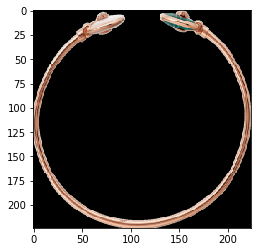

class_predict:  2
[1.48753664e-06 9.99998269e-01 2.11320713e-08 2.22704790e-07]


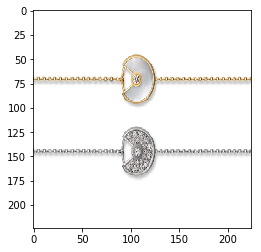

class_predict:  2
[1.72597489e-08 9.99688357e-01 1.14637990e-04 1.96988250e-04]


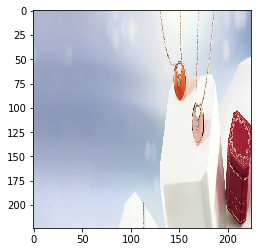

class_predict:  2
[7.87178124e-07 9.99922372e-01 4.81000094e-05 2.87411087e-05]


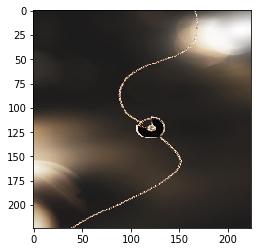

class_predict:  2
[3.63460931e-07 9.99852688e-01 1.46947118e-04 1.90510135e-09]


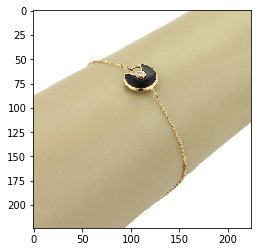

class_predict:  2
[9.40389289e-04 9.65764240e-01 2.39189911e-02 9.37638005e-03]


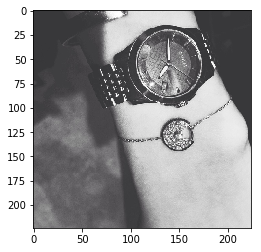

class_predict:  2
[2.23800471e-05 9.98568801e-01 1.40881602e-03 2.89256460e-09]


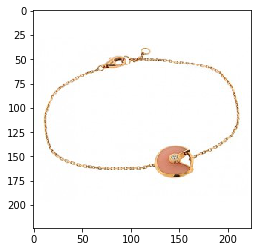

In [73]:
directory_1 = "/data/notebooks/visualrecommender/Dan_Li/Study_group/data/google_image_4/"
directory_2 = str(fold_name_list[1])+"/"
for i,image_id in enumerate(folder_2_image_id):
    print("class_predict: ",class_predict[predict_2[i]])
    print(predict_proba[predict_2[i]])
    img_path = directory_1+directory_2+str(image_id)+".jpg"
    original = load_img(img_path, target_size=(224, 224))
    plt.imshow(original)
    plt.show()

class_predict:  3
[8.69445160e-06 1.01795578e-06 9.69679305e-01 3.03109828e-02]


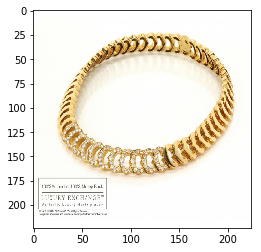

class_predict:  2
[3.64143385e-04 8.53566929e-01 1.46068534e-01 3.93388447e-07]


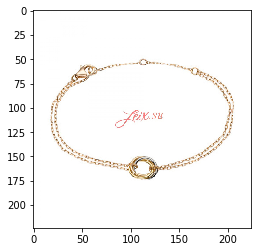

class_predict:  3
[3.11714175e-07 3.46291458e-09 9.99948909e-01 5.07757488e-05]


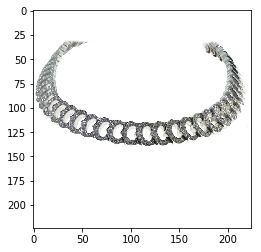

class_predict:  3
[1.16101527e-04 1.26955589e-08 9.99853629e-01 3.02566775e-05]


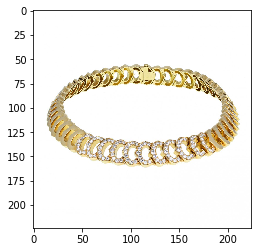

class_predict:  3
[5.17093761e-07 1.95989267e-03 9.98035064e-01 4.52595810e-06]


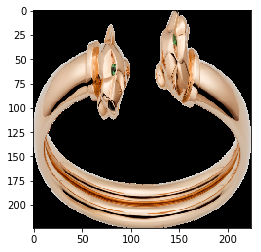

class_predict:  3
[6.33373453e-06 1.93296444e-07 9.99975932e-01 1.75412539e-05]


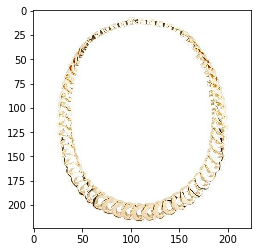

class_predict:  3
[2.56349363e-01 1.17943194e-01 6.25530345e-01 1.77097330e-04]


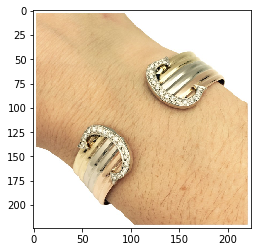

class_predict:  3
[1.50743717e-07 1.96092002e-07 9.99984861e-01 1.47923072e-05]


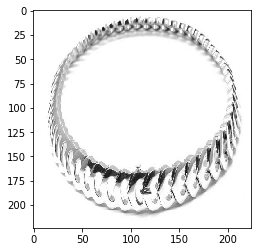

class_predict:  3
[6.77883679e-03 3.10656921e-02 9.62108194e-01 4.72769232e-05]


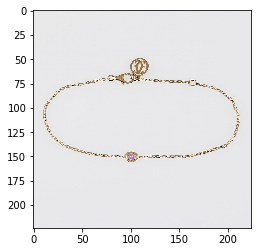

class_predict:  3
[7.17279760e-06 1.92535812e-08 9.99992806e-01 2.33995146e-09]


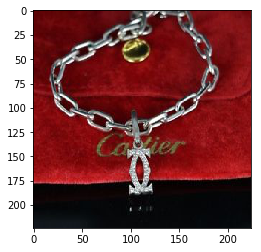

class_predict:  3
[8.47951901e-08 5.89795434e-12 9.99996377e-01 3.53800475e-06]


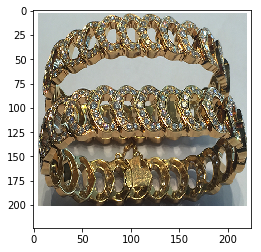

class_predict:  4
[0.04566878 0.00770974 0.27997151 0.66664997]


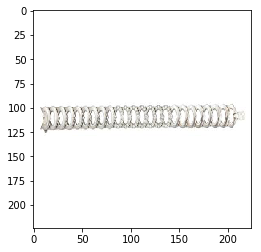

class_predict:  3
[4.01838702e-01 2.87261242e-02 5.69430386e-01 4.78724112e-06]


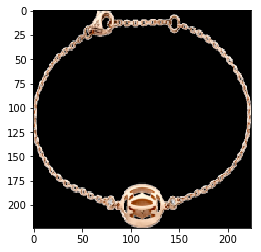

class_predict:  3
[4.03450355e-05 9.90180323e-05 9.99858243e-01 2.39386555e-06]


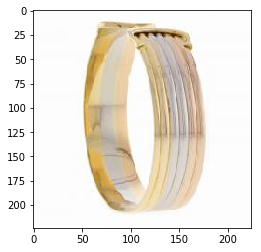

class_predict:  1
[9.91697504e-01 8.26915640e-03 9.20726129e-07 3.24192975e-05]


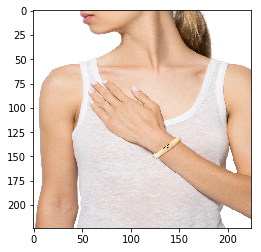

class_predict:  2
[6.92091483e-05 9.90860784e-01 9.06960878e-03 3.97772485e-07]


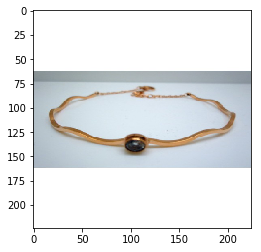

class_predict:  1
[9.43474458e-01 7.66892078e-03 4.88108671e-02 4.57545875e-05]


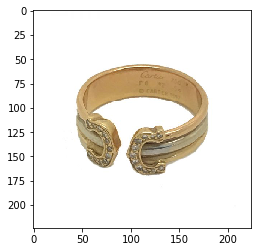

In [74]:
directory_1 = "/data/notebooks/visualrecommender/Dan_Li/Study_group/data/google_image_4/"
directory_2 = str(fold_name_list[2])+"/"
for i,image_id in enumerate(folder_3_image_id):
    print("class_predict: ",class_predict[predict_3[i]])
    print(predict_proba[predict_3[i]])
    img_path = directory_1+directory_2+str(image_id)+".jpg"
    original = load_img(img_path, target_size=(224, 224))
    plt.imshow(original)
    plt.show()

class_predict:  4
[4.10040935e-06 5.45680721e-05 8.53429845e-07 9.99940478e-01]


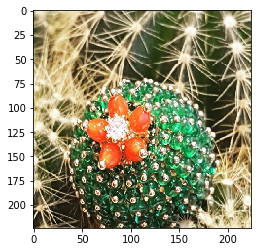

class_predict:  4
[6.26300125e-05 3.87052685e-03 8.20327368e-08 9.96066761e-01]


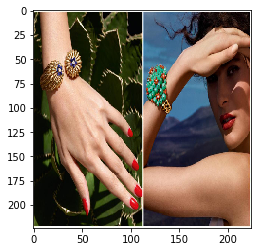

class_predict:  4
[2.42197568e-06 2.72529851e-05 4.34005331e-06 9.99965985e-01]


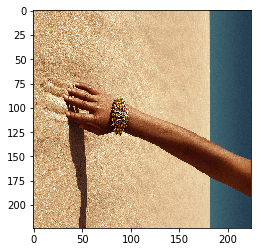

class_predict:  4
[0.00200425 0.45043038 0.02400736 0.52355801]


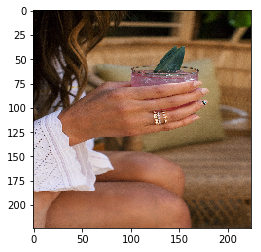

class_predict:  4
[5.39179120e-04 1.64697614e-01 2.89296820e-04 8.34473910e-01]


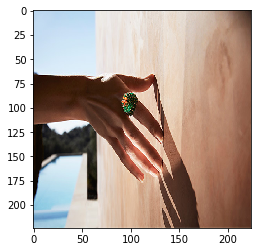

class_predict:  4
[4.40250989e-05 1.26827986e-09 2.21910350e-06 9.99953755e-01]


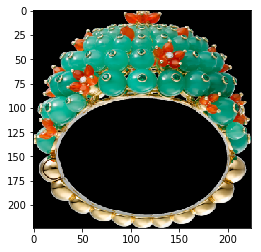

class_predict:  4
[7.23933205e-02 3.43779031e-03 1.99470969e-06 9.24166894e-01]


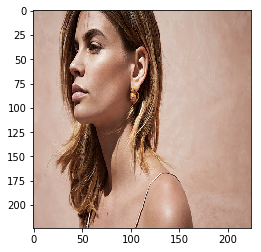

class_predict:  4
[3.06689597e-09 5.03120553e-10 5.15897286e-07 9.99999481e-01]


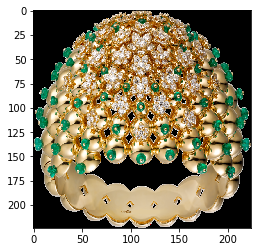

class_predict:  4
[4.40813247e-04 2.69405941e-02 1.06696622e-05 9.72607923e-01]


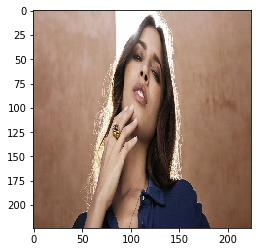

class_predict:  4
[4.18268254e-16 2.61445951e-12 2.70752721e-15 1.00000000e+00]


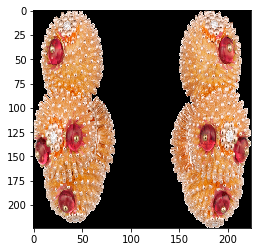

class_predict:  4
[5.12333777e-04 1.58424227e-05 5.54422277e-02 9.44029596e-01]


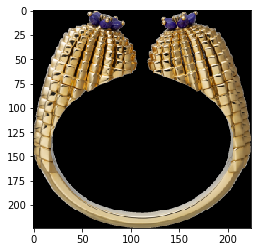

class_predict:  4
[2.94209149e-07 1.26957760e-06 9.37581006e-09 9.99998427e-01]


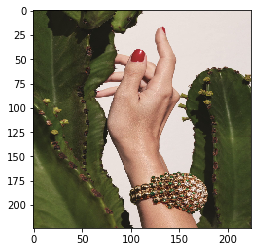

class_predict:  4
[2.87755657e-09 1.31222279e-04 6.40496484e-06 9.99862370e-01]


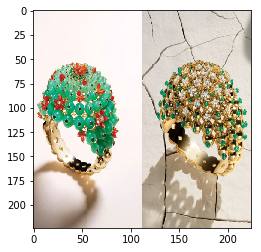

class_predict:  4
[0.43849197 0.00180973 0.01176395 0.54793436]


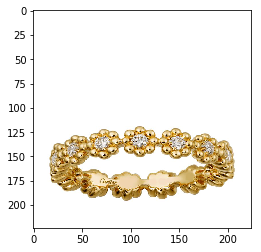

class_predict:  4
[4.69604654e-09 6.17498900e-06 4.03376810e-02 9.59656139e-01]


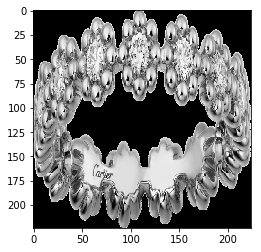

class_predict:  4
[1.60981053e-05 2.60481661e-03 2.08172756e-05 9.97358268e-01]


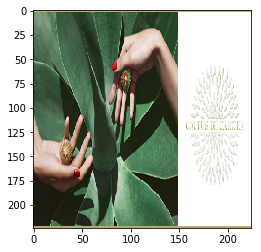

class_predict:  2
[0.22859481 0.48236622 0.02004289 0.26899607]


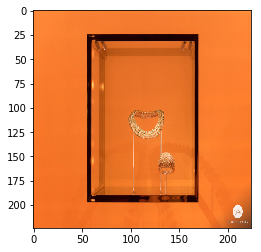

class_predict:  4
[5.83706660e-09 3.99638913e-07 3.57682171e-06 9.99996018e-01]


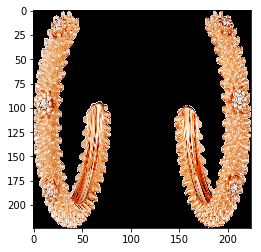

class_predict:  4
[3.12091189e-10 1.40483689e-09 1.38692822e-10 9.99999998e-01]


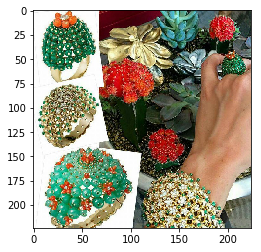

In [75]:
directory_1 = "/data/notebooks/visualrecommender/Dan_Li/Study_group/data/google_image_4/"
directory_2 = str(fold_name_list[3])+"/"
for i,image_id in enumerate(folder_4_image_id):
    print("class_predict: ",class_predict[predict_4[i]])
    print(predict_proba[predict_4[i]])
    img_path = directory_1+directory_2+str(image_id)+".jpg"
    original = load_img(img_path, target_size=(224, 224))
    plt.imshow(original)
    plt.show()